# Introduction on Project

# Importing the required libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv('agriculture_training_data.csv')
dft=pd.read_csv('agriculture_test_data.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
dft.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
df.shape

(4599, 10)

In [7]:
dft.shape

(1199, 9)

In [8]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

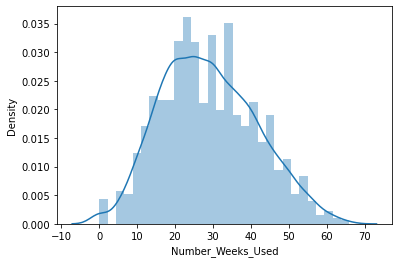

In [9]:
sns.distplot(df['Number_Weeks_Used'])

<AxesSubplot:xlabel='Number_Weeks_Used'>

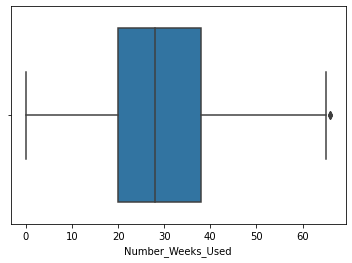

In [10]:
sns.boxplot(df['Number_Weeks_Used'])

In [15]:
df.drop('ID',axis=1,inplace=True)
dft.drop('ID',axis=1,inplace=True)

In [16]:
#filling the missing values
from sklearn.impute import KNNImputer  
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
df1 = imputer.fit_transform(df)

In [21]:
df1 = pd.DataFrame(df1, columns = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'])

In [22]:
df1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [23]:
df1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [24]:
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [25]:
df.shape

(4599, 9)

In [26]:
df1.shape

(4599, 9)

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

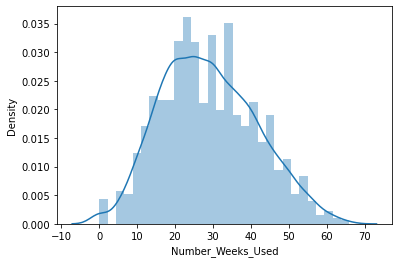

In [27]:
sns.distplot(df['Number_Weeks_Used'])

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

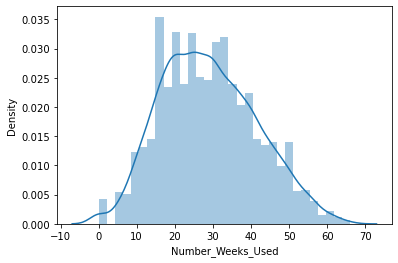

In [28]:
sns.distplot(df1['Number_Weeks_Used'])

In [29]:
df1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,209.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2,257.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
3,257.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
4,342.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

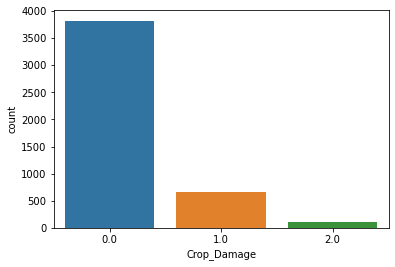

In [30]:
sns.countplot(df1['Crop_Damage'])

# Observations:
    
    1.There is class imbalance

# Removal of Outliers

# Zscore method

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 0.048488801913459445


**accuracy before removing the outliers**

In [32]:
x=df1.drop('Crop_Damage',axis=1)
y=df1['Crop_Damage']
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.816
classification report is
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       866
         1.0       0.36      0.03      0.06       161
         2.0       0.00      0.00      0.00        31

    accuracy                           0.82      1058
   macro avg       0.39      0.34      0.32      1058
weighted avg       0.73      0.82      0.74      1058

confusion matrix is
[[858   8   0]
 [156   5   0]
 [ 30   1   0]]




**Accuracy after removing the outliers**

In [33]:
x=df2.drop('Crop_Damage',axis=1)
y=df2['Crop_Damage']
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.843
classification report is
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       851
         1.0       0.43      0.04      0.07       156

    accuracy                           0.84      1007
   macro avg       0.64      0.51      0.49      1007
weighted avg       0.78      0.84      0.78      1007

confusion matrix is
[[843   8]
 [150   6]]




 **from the above observation we can say that dont remove the outliers**

# Splitting the variable

In [34]:
x=df1.drop('Crop_Damage',axis=1)
y=df1['Crop_Damage']

In [35]:
x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.270486
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [37]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [38]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.23,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.477
classification report is
              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57       905
         1.0       0.40      0.22      0.28       868
         2.0       0.42      0.70      0.53       863

    accuracy                           0.48      2636
   macro avg       0.48      0.48      0.46      2636
weighted avg       0.49      0.48      0.46      2636

confusion matrix is
[[469 120 316]
 [175 188 505]
 [103 159 601]]




Observations:
    
    Eventhough accuracy decrease it has good f1 score, so lets continue with it

# Standard scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x_over)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_over,test_size=0.23,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.515
classification report is
              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62       905
         1.0       0.41      0.24      0.31       868
         2.0       0.49      0.65      0.56       863

    accuracy                           0.52      2636
   macro avg       0.50      0.51      0.50      2636
weighted avg       0.50      0.52      0.50      2636

confusion matrix is
[[584 140 181]
 [252 212 404]
 [139 162 562]]




Observations:
    
    1.The accuracy and f1 score both increased after standard scaling

# Building the model

In [41]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [42]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xs,y_over,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.5421756835369401 on random state 20


In [43]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_over,test_size=0.3,random_state=20)

In [44]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.542
classification report is
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64      1140
         1.0       0.45      0.30      0.36      1112
         2.0       0.53      0.63      0.58      1186

    accuracy                           0.54      3438
   macro avg       0.53      0.54      0.53      3438
weighted avg       0.53      0.54      0.53      3438

confusion matrix is
[[778 172 190]
 [312 333 467]
 [200 233 753]]




In [45]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.535
classification report is
              precision    recall  f1-score   support

         0.0       0.61      0.68      0.65      1140
         1.0       0.44      0.15      0.22      1112
         2.0       0.50      0.76      0.60      1186

    accuracy                           0.53      3438
   macro avg       0.52      0.53      0.49      3438
weighted avg       0.52      0.53      0.49      3438

confusion matrix is
[[774 101 265]
 [308 167 637]
 [178 111 897]]




In [46]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.722
classification report is
              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      1140
         1.0       0.74      0.46      0.57      1112
         2.0       0.70      0.84      0.76      1186

    accuracy                           0.72      3438
   macro avg       0.73      0.72      0.71      3438
weighted avg       0.72      0.72      0.71      3438

confusion matrix is
[[971  83  86]
 [259 516 337]
 [ 89 101 996]]




In [47]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.659
classification report is
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73      1140
         1.0       0.62      0.40      0.48      1112
         2.0       0.64      0.82      0.72      1186

    accuracy                           0.66      3438
   macro avg       0.66      0.65      0.64      3438
weighted avg       0.66      0.66      0.65      3438

confusion matrix is
[[857 148 135]
 [257 442 413]
 [ 96 123 967]]




In [48]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.83
classification report is
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      1140
         1.0       0.76      0.76      0.76      1112
         2.0       0.89      0.91      0.90      1186

    accuracy                           0.83      3438
   macro avg       0.83      0.83      0.83      3438
weighted avg       0.83      0.83      0.83      3438

confusion matrix is
[[ 932  171   37]
 [ 168  842  102]
 [  20   88 1078]]




In [49]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.812
classification report is
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      1140
         1.0       0.78      0.71      0.74      1112
         2.0       0.82      0.95      0.88      1186

    accuracy                           0.81      3438
   macro avg       0.81      0.81      0.81      3438
weighted avg       0.81      0.81      0.81      3438

confusion matrix is
[[ 870  183   87]
 [ 161  789  162]
 [   9   45 1132]]




In [50]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.702
classification report is
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1140
         1.0       0.60      0.49      0.54      1112
         2.0       0.67      0.70      0.68      1186

    accuracy                           0.70      3438
   macro avg       0.69      0.70      0.69      3438
weighted avg       0.69      0.70      0.69      3438

confusion matrix is
[[1036   74   30]
 [ 186  550  376]
 [  59  300  827]]




In [56]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.897
classification report is
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1140
         1.0       0.90      0.81      0.85      1112
         2.0       0.94      0.95      0.94      1186

    accuracy                           0.90      3438
   macro avg       0.90      0.90      0.90      3438
weighted avg       0.90      0.90      0.90      3438

confusion matrix is
[[1052   71   17]
 [ 150  901   61]
 [  25   29 1132]]




# Cross validation scores

In [58]:
models=[lg,gnb,SVC(kernel='rbf'),SVC(kernel='poly'),dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,xs,y_over,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.503


GaussianNB() score is:
0.508


SVC() score is:
0.664


SVC(kernel='poly') score is:
0.592


DecisionTreeClassifier() score is:
0.788


KNeighborsClassifier() score is:
0.765


AdaBoostClassifier() score is:
0.691


RandomForestClassifier() score is:
0.854




In [59]:
grid_param={
    'n_estimators':[10,50,100],
    'algorithm':['SAMME', 'SAMME.R']
}

gd_sr=GridSearchCV(estimator=add,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(xs,y_over)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'SAMME.R', 'n_estimators': 100}
0.6976439790575916


In [68]:
add=sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [69]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.705
classification report is
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85      1140
         1.0       0.60      0.48      0.54      1112
         2.0       0.67      0.72      0.69      1186

    accuracy                           0.70      3438
   macro avg       0.69      0.70      0.69      3438
weighted avg       0.69      0.70      0.70      3438

confusion matrix is
[[1037   79   24]
 [ 189  536  387]
 [  61  275  850]]


